# Importing Libaries

In [1]:
import csv
import json
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("CardioGoodFitness-1.csv")

In [15]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


# Performing Exploratory data analysis



In [16]:
#Inspecting the first few rows of the data using the tail function

data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [17]:
#Inspecting the last few rows of the data using the tail function

data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [18]:
data.columns #it displays the number of colums in the data set

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [19]:
#selecting any number of rows of data

data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
163,TM798,28,Male,18,Partnered,7,5,77191,180
95,TM498,24,Male,14,Single,3,4,48891,106
44,TM195,28,Female,14,Partnered,2,3,46617,56
106,TM498,25,Female,14,Single,2,2,45480,42
154,TM798,25,Male,18,Partnered,6,4,70966,180


In [20]:
#dimension of the data

data.shape

(180, 9)

In [21]:
#Checking the data types of each column

data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [22]:
#Checking more peculiar information on the data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [23]:
#Perfoming basic statistics on the dataset

data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- The highest income from my dataset is #104581

- The minimun income earned is #29562

In [24]:
#Checking for missing values in the data

data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Data Visualization

In [25]:
# Define a dictionary of products and their customer profiles

products = {
    'TM195': {
        'profile': [
            'Beginner or entry-level exercisers who want a basic treadmill for walking or jogging.',
            'Individuals who want to improve their cardiovascular health and endurance.',
            'Those who prefer a simpler design and lower price point.'
        ]
            },
    'TM498': {
        'profile': [
            'Intermediate to advanced exercisers who want more features and higher quality.',
            'Runners or athletes who need a durable and reliable treadmill for intense workouts.',
            'Those who want a larger running surface and more advanced workout programs.',
            'Fitness enthusiasts who value technology and data tracking.'
        ]},
    'TM798': {
        'profile': [
            'Fitness studios that need a high-performance treadmill for frequent use.',
            'Serious runners or athletes who demand the best quality and performance.',
            'Those who want a spacious running surface and advanced shock absorption.',
            'Fitness enthusiasts who value personalized workout options and entertainment features.'
        ]
    }
}


In [26]:
# Print the customer profiles for each product

for product, details in products.items():
    print(f"Customer Profile for {product}:")
    for profile in details['profile']:
        print(f"- {profile}")
    print()

Customer Profile for TM195:
- Beginner or entry-level exercisers who want a basic treadmill for walking or jogging.
- Individuals who want to improve their cardiovascular health and endurance.
- Those who prefer a simpler design and lower price point.

Customer Profile for TM498:
- Intermediate to advanced exercisers who want more features and higher quality.
- Runners or athletes who need a durable and reliable treadmill for intense workouts.
- Those who want a larger running surface and more advanced workout programs.
- Fitness enthusiasts who value technology and data tracking.

Customer Profile for TM798:
- Fitness studios that need a high-performance treadmill for frequent use.
- Serious runners or athletes who demand the best quality and performance.
- Those who want a spacious running surface and advanced shock absorption.
- Fitness enthusiasts who value personalized workout options and entertainment features.



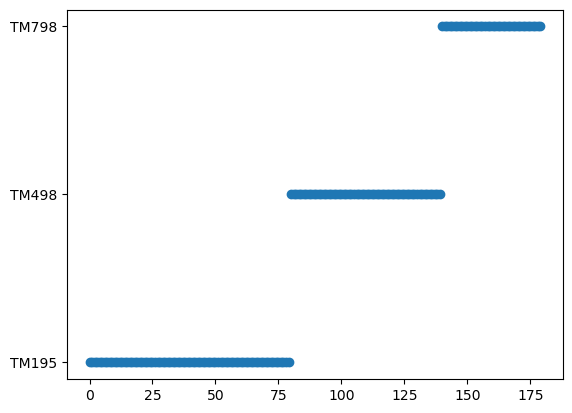

In [34]:
Plot = plt.scatter(data.index, data["Product"])
plt.show()

- According to the graph, a greater number of individuals are purchasing TM195 in comparison to other products.

<AxesSubplot:xlabel='Age', ylabel='Count'>

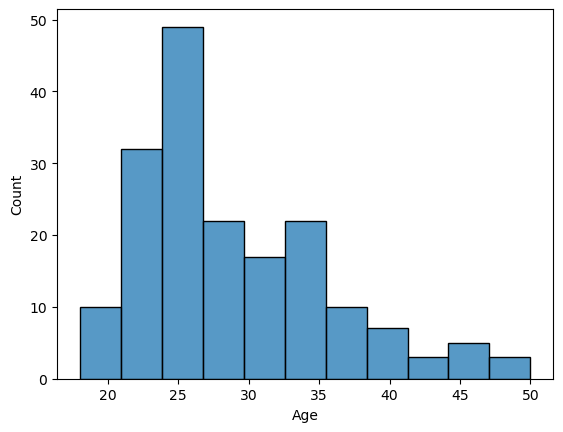

In [28]:
sns.histplot(data["Age"])

- The younger individuals in the dataset exhibit higher levels of activity in comparison to the older generation.

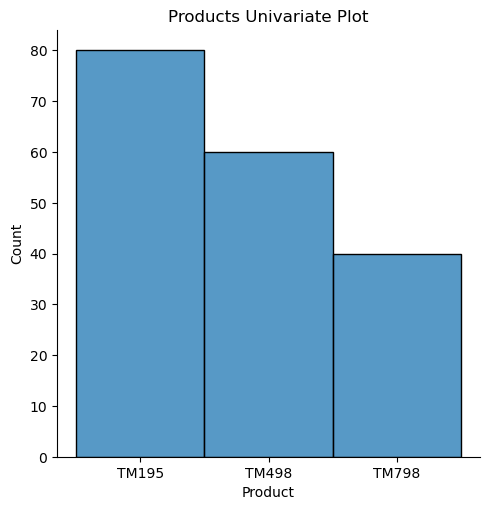

In [29]:
univariate= sns.displot(data= data, x='Product', bins=4)

univariate.set(title='Products Univariate Plot')

[Text(0.5, 1.0, 'Product vs Age')]

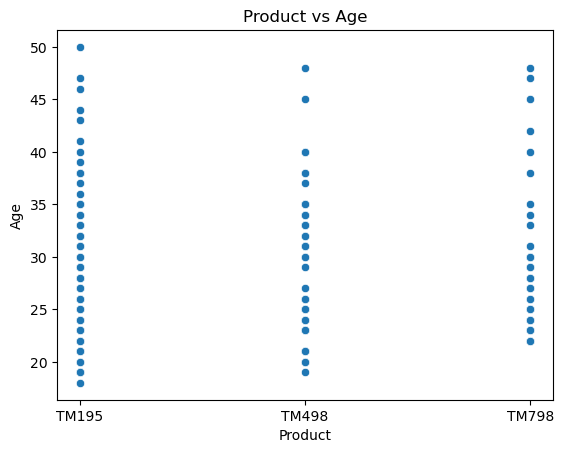

In [30]:
scatterplot = sns.scatterplot(data=data, x='Product', y='Age')

scatterplot.set(title='Product vs Age')

[Text(0.5, 1.0, 'Age vs Usage')]

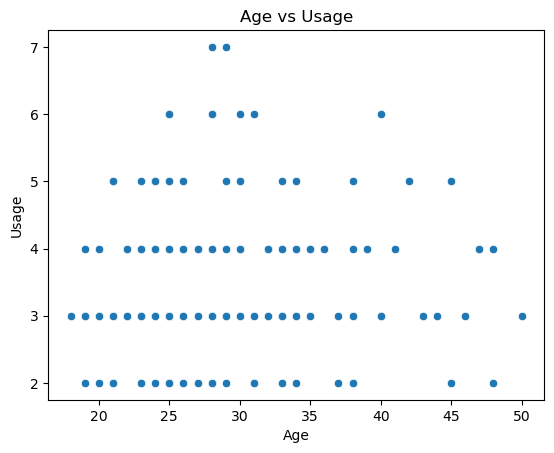

In [31]:
scatterplot = sns.scatterplot(data=data, x='Age', y='Usage')

scatterplot.set(title='Age vs Usage')

- The younger generation tend to use the CardioGoodFitness compared to the younger generation

[Text(0.5, 1.0, 'Product vs Education')]

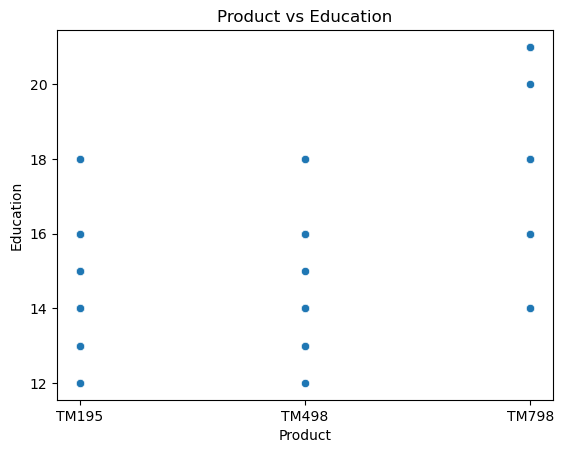

In [32]:
scatterplot = sns.scatterplot(data=data, x='Product', y='Education')

scatterplot.set(title='Product vs Education')

# Insights and recommendations that will help the company in targeting new customers.

- The company should focuses more on TM195 products compared to the other products and create awareness especially among the yougner ones. This will create a unique selling proposition.


- The company should develop a strong brand image that will help to attract new customers. The brand image should be consistent across all marketing channels, including social media, website, and advertising.


- Offering incentives such as discounts or promotions can be an effective way to attract new customers. The incentives should be tailored to the target audience and be communicated through targeted advertising.


- Providing exceptional customer service can help to attract new customers and retain existing ones. The company should focus on providing a personalized experience and respond promptly to customer inquiries and feedback.